# 12과 시계열 데이터

## 1.환경준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* KOSPI 지수 데이터

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/KOSPI.csv"
                   , usecols= ['Date', 'Close', 'Volume'])

data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.weekday

data['Close_Lag'] = data['Close'].shift()
data['Volume_Lag'] = data['Volume'].shift()
data.drop('Volume', axis = 1, inplace = True)

data.dropna(axis=0, inplace=True)

data.head()

,Date,Close,Year,Month,Weekday,Close_Lag,Volume_Lag
1,2014-10-01,1991.54,2014,10,2,2020.09,322812.0
2,2014-10-02,1976.16,2014,10,3,1991.54,351581.0
3,2014-10-06,1968.39,2014,10,0,1976.16,322656.0
4,2014-10-07,1972.91,2014,10,1,1968.39,325078.0
5,2014-10-08,1965.25,2014,10,2,1972.91,328234.0


* 시계열 데이터의 전처리
    * 날짜 타입 변환(pd.to_datetime) 후 날짜 요소 뽑기 : .dt.날짜요소
        * to_datetime : https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
        * .dt.  : year, month, day, weekday, ...
    * 전시점데이터 : .shift() : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html
    * 이동평균 : .rolling().mean() : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

## 2.시계열 데이터란?

* 데이터셋
    * 일반 데이터셋 : 분석단위(행) 하나 하나가 개별 instance 입니다.
    * 시계열 데이터 : 데이터 분석 단위(행) 간에 (시간) 순서(sequence)가 있는 데이터

* 시계열 데이터 구분은, 비즈니스 이해단계에서 [문제정의]시 결정 됩니다. 
    * 해결해야 할 문제가 시간 순서 관점이 필요한지 아닌지. 


* KOSPI 2014.10 ~ 2019.09 데이터
    * Close : 코스피 종가(target)
    * Weekday : 요일 (0-월요일, 6-일요일)
    * Close_Lag : 전날 종가
    * Volume_Lag : 전날 거래량

In [ ]:
plt.figure(figsize = (12,8))
plt.plot('Date', 'Close', data = data, linewidth = .7)
plt.grid()
plt.show()

* 시계열 데이터는 시간(시기)을 고려해야 합니다.
    * 어느 기간? 
    * 반복되는 주기?


## 3.단변량

### 1) 숫자

* Close의 분포를 살펴보면…
    * 하나의 박스플롯으로 설명이 되나요?
    * 히스트그램을 보면 분포가 여러 개로 나뉘어 보입니다. 어떻게 해석해야 할까요?



In [ ]:
plt.hist(data['Close'], bins = 100, edgecolor = 'grey')
plt.show()

In [ ]:
plt.boxplot(data['Close'], vert = False)
plt.show()

### 2) 범주

In [ ]:
sns.countplot(x="Weekday", data=data)
plt.show()

In [ ]:
temp = data['Weekday'].value_counts()

plt.pie(temp.values, labels = temp.index, autopct='%.2f%%')
plt.show()

## 4.이변량

### 1) 숫자 vs 숫자

* 전날 종가와 오늘 종가를 비교해 보겠습니다.
    * 산점도 : 완전 직선
    * 상관분석 : 상관계수 거의 1, p-value 는 0!
    * 그러면 전날 종가만 있으면 다음날 코스피 지수 예측은 확실한가요?

In [ ]:
plt.scatter(data['Close_Lag'], data['Close'], alpha = .3)
plt.show()

In [ ]:
# 상관계수와 p-value 
spst.pearsonr(data['Close_Lag'], data['Close'])

### 2) 범주 vs 숫자

* 요일별로 주가가 달라질까요?
    * 요일은 주가와 아무런 관련이 없어 보입니다.
    * 진짜 그럴까요?

In [ ]:
temp = data.loc[data.Date.between('2019-01-01','2019-01-31')]

sns.barplot(x="Weekday", y="Close", data = temp)
plt.show()

## 5.해결을 위한 아이디어

* 시계열 데이터를 smoothing 하여 그리기

In [19]:
# 이동평균 변수 만들기
data['Close_MA'] = data['Close'].rolling(20).mean()

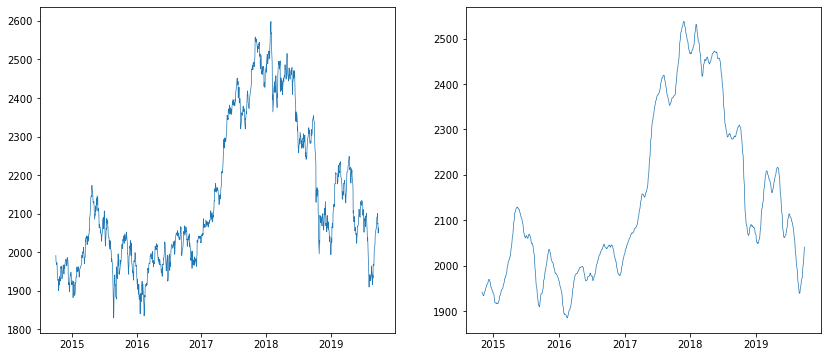

In [20]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.plot('Date', 'Close', data = data, linewidth = .7)

plt.subplot(1,2,2)
plt.plot('Date', 'Close_MA', data = data, linewidth = .7)
plt.show()


* 이전 데이터 대비 증감으로 분석하기

In [ ]:
# 데이터 차분(difference) 데이터를 만들고
data['diff'] = data['Close'] - data['Close_Lag']

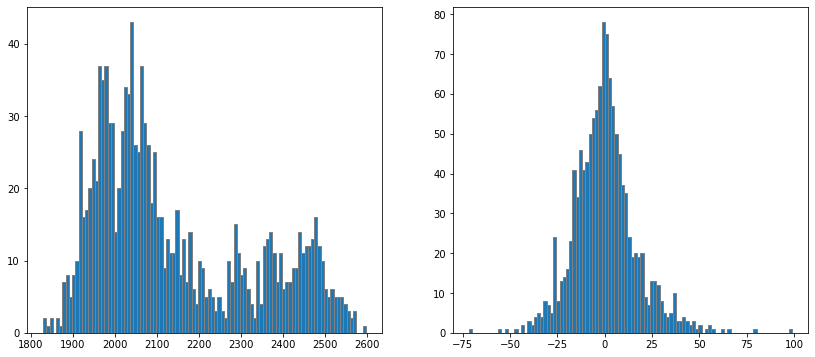

In [24]:
# 그래프를 그리면, 이전과 다른 새로운 관점의 그래프를 얻을 수 있습니다.

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.hist(data['Close'], bins = 100, edgecolor = 'grey')

plt.subplot(1,2,2)
plt.hist(data['Dif_Close'], bins = 100, edgecolor = 'grey')
plt.show()


# 종합실습

## 1.환경준비

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/KOSPI.csv"
                   , usecols= ['Date', 'Close', 'Volume'])

data['Date'] = pd.to_datetime(data['Date'])
data['Close_Lag'] = data['Close'].shift()
data['Volume_Lag'] = data['Volume'].shift()

data.dropna(axis=0, inplace=True)

data.head()

,Date,Close,Volume,Close_Lag,Volume_Lag
1,2014-10-01,1991.54,351581,2020.09,322812.0
2,2014-10-02,1976.16,322656,1991.54,351581.0
3,2014-10-06,1968.39,325078,1976.16,322656.0
4,2014-10-07,1972.91,328234,1968.39,325078.0
5,2014-10-08,1965.25,266180,1972.91,328234.0


## 2.시계열 분석을 위한 추가 변수를 만들어 봅시다.

① 전일 주가 대비 차이

In [13]:
data['Dif_Close'] = data['Close_Lag'] - data ['Close']

② 전일주가 대비 ①의 비율(증감율) 

In [21]:
data['Dif_Close_Per'] = (data['Close_Lag'] / data ['Close'] - 1) *100

data.head()

,Date,Close,Volume,Close_Lag,Volume_Lag,Dif,Dif_Per,Dif_Close,Dif_Close_Per,Dif_Vol,Dif_Vol_Per,Close_MA
1,2014-10-01,1991.54,351581,2020.09,322812.0,28.55,1.433564,28.55,1.433564,-28769.0,-8.182752,NaN
2,2014-10-02,1976.16,322656,1991.54,351581.0,15.38,0.778277,15.38,0.778277,28925.0,8.964656,NaN
3,2014-10-06,1968.39,325078,1976.16,322656.0,7.77,0.394739,7.77,0.394739,-2422.0,-0.745052,NaN
4,2014-10-07,1972.91,328234,1968.39,325078.0,-4.52,-0.229103,-4.52,-0.229103,-3156.0,-0.961509,NaN
5,2014-10-08,1965.25,266180,1972.91,328234.0,7.66,0.389772,7.66,0.389772,62054.0,23.312796,NaN


③ 전일 거래량 대비 차이

In [15]:
data['Dif_Vol'] = data['Volume_Lag'] - data ['Volume']

④ 전일 거래량 대비 ③의 비율(증감율) 

In [18]:
data['Dif_Vol_Per'] = (data['Volume_Lag'] / data ['Volume'] - 1) *100

data.head()

,Date,Close,Volume,Close_Lag,Volume_Lag,Dif,Dif_Per,Dif_Close,Dif_Close_Per,Dif_Vol,Dif_Vol_Per
1,2014-10-01,1991.54,351581,2020.09,322812.0,28.55,1.433564,28.55,1.433564,-28769.0,-8.182752
2,2014-10-02,1976.16,322656,1991.54,351581.0,15.38,0.778277,15.38,0.778277,28925.0,8.964656
3,2014-10-06,1968.39,325078,1976.16,322656.0,7.77,0.394739,7.77,0.394739,-2422.0,-0.745052
4,2014-10-07,1972.91,328234,1968.39,325078.0,-4.52,-0.229103,-4.52,-0.229103,-3156.0,-0.961509
5,2014-10-08,1965.25,266180,1972.91,328234.0,7.66,0.389772,7.66,0.389772,62054.0,23.312796


⑤ 최근 20일 이동평균 주가

In [22]:
data.tail(20)

,Date,Close,Volume,Close_Lag,Volume_Lag,Dif,Dif_Per,Dif_Close,Dif_Close_Per,Dif_Vol,Dif_Vol_Per,Close_MA
1208,2019-08-30,1967.79,317733,1933.41,285103.0,-34.38,-1.747138,-34.38,-1.747138,-32630.0,-10.269629,1940.5825
1209,2019-09-02,1969.19,262154,1967.79,317733.0,-1.40,-0.071095,-1.40,-0.071095,55579.0,21.200897,1939.1355
1210,2019-09-03,1965.69,342077,1969.19,262154.0,3.50,0.178055,3.50,0.178055,-79923.0,-23.364038,1940.0710
1211,2019-09-04,1988.53,348722,1965.69,342077.0,-22.84,-1.148587,-22.84,-1.148587,-6645.0,-1.905529,1943.6225
1212,2019-09-05,2004.75,488067,1988.53,348722.0,-16.22,-0.809078,-16.22,-0.809078,-139345.0,-28.550383,1948.3745
1213,2019-09-06,2009.13,384440,2004.75,488067.0,-4.38,-0.218005,-4.38,-0.218005,103627.0,26.955312,1952.8005
1214,2019-09-09,2019.55,511821,2009.13,384440.0,-10.42,-0.515957,-10.42,-0.515957,-127381.0,-24.887803,1956.8905
1215,2019-09-10,2032.08,504390,2019.55,511821.0,-12.53,-0.616610,-12.53,-0.616610,7431.0,1.473265,1961.3800
1216,2019-09-11,2049.20,429075,2032.08,504390.0,-17.12,-0.835448,-17.12,-0.835448,75315.0,17.552875,1967.5485
1217,2019-09-16,2062.22,493516,2049.20,429075.0,-13.02,-0.631358,-13.02,-0.631358,-64441.0,-13.057530,1973.7410


⑥ 최근 20일 이동평균 거래량

In [25]:
data['Volume_MA'] = data['Volume'].rolling(20).mean()

data.tail(20)

,Date,Close,Volume,Close_Lag,Volume_Lag,Dif,Dif_Per,Dif_Close,Dif_Close_Per,Dif_Vol,Dif_Vol_Per,Close_MA,Volume_MA
1208,2019-08-30,1967.79,317733,1933.41,285103.0,-34.38,-1.747138,-34.38,-1.747138,-32630.0,-10.269629,1940.5825,500519.00
1209,2019-09-02,1969.19,262154,1967.79,317733.0,-1.40,-0.071095,-1.40,-0.071095,55579.0,21.200897,1939.1355,491699.80
1210,2019-09-03,1965.69,342077,1969.19,262154.0,3.50,0.178055,3.50,0.178055,-79923.0,-23.364038,1940.0710,476823.50
1211,2019-09-04,1988.53,348722,1965.69,342077.0,-22.84,-1.148587,-22.84,-1.148587,-6645.0,-1.905529,1943.6225,457280.20
1212,2019-09-05,2004.75,488067,1988.53,348722.0,-16.22,-0.809078,-16.22,-0.809078,-139345.0,-28.550383,1948.3745,443644.70
1213,2019-09-06,2009.13,384440,2004.75,488067.0,-4.38,-0.218005,-4.38,-0.218005,103627.0,26.955312,1952.8005,424008.45
1214,2019-09-09,2019.55,511821,2009.13,384440.0,-10.42,-0.515957,-10.42,-0.515957,-127381.0,-24.887803,1956.8905,416882.30
1215,2019-09-10,2032.08,504390,2019.55,511821.0,-12.53,-0.616610,-12.53,-0.616610,7431.0,1.473265,1961.3800,420744.80
1216,2019-09-11,2049.20,429075,2032.08,504390.0,-17.12,-0.835448,-17.12,-0.835448,75315.0,17.552875,1967.5485,409196.55
1217,2019-09-16,2062.22,493516,2049.20,429075.0,-13.02,-0.631358,-13.02,-0.631358,-64441.0,-13.057530,1973.7410,398893.10


## 3.시계열 데이터를 smoothing 하여 그리기

① 주가, 이동평균 주가 그래프를 각각 그리기

② 거래량, 이동평균 거래량 그래프를 각각 그리기

### 4. 전일 대비 증감 데이터로 분석하기

① 주가 데이터, 전일 대비 주가 증감, 증감율 비교하는 히스토그램 그리기

* 추가로 무엇을 / 어떻게 분석을 해볼 수 있을까요?

② 거래량 데이터, 전일 대비 증감, 증감율 비교하는 히스토그램 그리기

* 추가로 무엇을 / 어떻게 분석을 해볼 수 있을까요?